In [55]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [56]:
american_df = pd.read_table("American.csv", sep = ',')
japanese_df = pd.read_csv("Japanese.csv", sep = ',')
europe_df = pd.read_csv("European.csv", sep = ',')
large_car_df = pd.read_csv("Fat.csv", sep = ',')
tiny_car_df = pd.read_csv("Tiny.csv", sep = ',')
speedy_car_df = pd.read_csv("Speddy.csv", sep = ',')

In [57]:
american_df['Unnamed: 3'].unique()

array([nan, 'Business Category', 'Comscore', 'Custom',
       'Experian Mosaic Household', 'Interest', 'Interest: Fitness',
       'Lifestyle', 'Lifestyle: Food and Beverage', 'Restaurants',
       'Shopper: Apparel', 'Shopper: Auto', 'Shopper: Big Box',
       'Shopper: Dept.', 'Shopper: Discount', 'Shopper: Grocery',
       'Shopper: Home & Furniture', 'Shopper: Home Improvement',
       'Shopper: Kids', 'Shopper: Misc', 'Shopper: Pet',
       'Shopper: Pharmacy', 'Shopper: Sport', 'Shopper: Tech',
       'Shopper: Telco', 'Travel: Destinations', 'Travel: Hotels'],
      dtype=object)

In [58]:
american_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'American Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)
japanese_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'Japanese Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)
europe_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'European Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)
large_car_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'Large Car Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)

tiny_car_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'Tiny Car Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)

speedy_car_df.rename(columns={'Regions': 'Type', 'California': 'Name', 
                            'Unnamed: 2' : 'Speedy Car Hits', 'Unnamed: 3': 'Business Category'}, inplace= True)


categories = ['Restaurants', 'Shopper: Grocery', 'Shopper: Telco', 'Interest', 'Lifestyle']

In [59]:
def drop_unecessary(df):
    df.dropna(inplace=True)
    df.drop(columns='Type',inplace = True)
    return df

def drop_business_category(categories, df):
    for e in df['Business Category']:
        if e not in categories:
            df = df[df['Business Category'] != e]
    return df

In [60]:
def name_simplify(name):
    if '>' in name:
        name = name.split('>')
        name = name[-1]
    return name 

def apply_name_simplify(df):
    for e in df['Name']:
        df.replace(e,name_simplifyw(e),inplace = True)
    df.set_index('Business Category',inplace = True)
    return df

In [61]:
#get rid of categories we won't evaluate
american_df = drop_business_category(categories, american_df)
japanese_df = drop_business_category(categories, japanese_df)
europe_df = drop_business_category(categories, europe_df)
large_car_df = drop_business_category(categories, large_car_df)
tiny_car_df = drop_business_category(categories, tiny_car_df)
speedy_car_df = drop_business_category(categories, speedy_car_df)

#get rid of null values and Type column 
american_df = drop_unecessary(american_df)
japanese_df = drop_unecessary(japanese_df)
europe_df = drop_unecessary(europe_df)
large_car_df = drop_unecessary(large_car_df)
tiny_car_df = drop_unecessary(tiny_car_df)
speedy_car_df = drop_unecessary(speedy_car_df)

#get rid of the subcategories for the name 
american_df = apply_name_simplify(american_df)
japanese_df = apply_name_simplify(japanese_df)
europe_df = apply_name_simplify(europe_df)
large_car_df = apply_name_simplify(large_car_df)
tiny_car_df = apply_name_simplify(tiny_car_df)
speedy_car_df = apply_name_simplify(speedy_car_df)

dataframes have cell store visits and subscribers, e.g t-mobile store visits and t-mobile subscribers 

In [62]:
#method to convert string values in necessary columns to ints
def convert_to_int(df, column_names):
    for name in column_names:
        for e in df[name]:
            df.replace(e,int(e),inplace=True)
    return df

In [63]:
#create dataframe consisting of region categories
regional_df = american_df
regional_df['Japanese Hits'] = japanese_df['Japanese Hits']
regional_df['European Hits'] = europe_df['European Hits']

#create dataframe consisting of size categories
size_df = large_car_df
size_df['Tiny Car Hits'] = tiny_car_df['Tiny Car Hits']

In [64]:
#convert hit columns from string to int and reset the index for both dataframes
regional_int_columns = ['American Hits', 'Japanese Hits', 'European Hits']
regional_df = convert_to_int(regional_df,regional_int_columns)
regional_df.reset_index(inplace = True)


size_int_columns = ['Large Car Hits', 'Tiny Car Hits']
size_df = convert_to_int(size_df,size_int_columns)
size_df.reset_index(inplace=True)

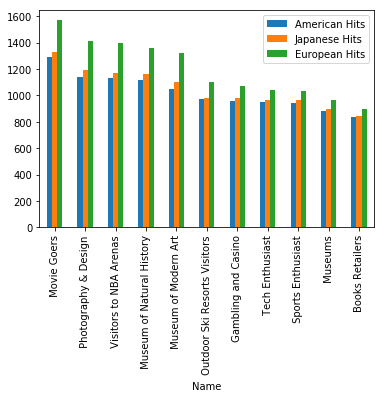

In [65]:
regional_interest_df = regional_df.loc[regional_df['Business Category'] == 'Interest']
regional_telephone_df.plot.bar(x='Name')

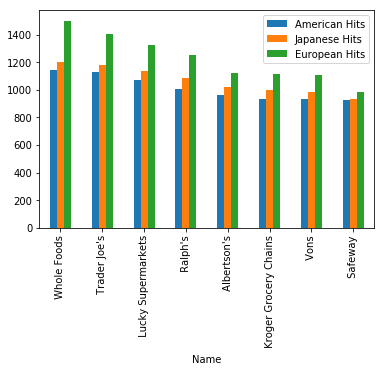

In [66]:
regional_grocery_df = regional_df.loc[regional_df['Business Category'] == 'Shopper: Grocery']
regional_grocery_df.plot.bar(x='Name')

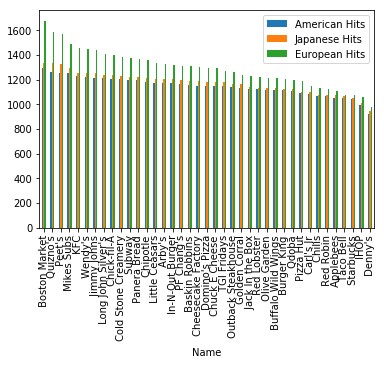

In [67]:
regional_restaurants_df = regional_df.loc[regional_df['Business Category'] == 'Restaurants']
regional_restaurants_df.plot.bar(x='Name',)

Data not sufficiently standardized, appears that european hits > japanese hits > american hits for every single category. Will check the data for tiny vs large cars.

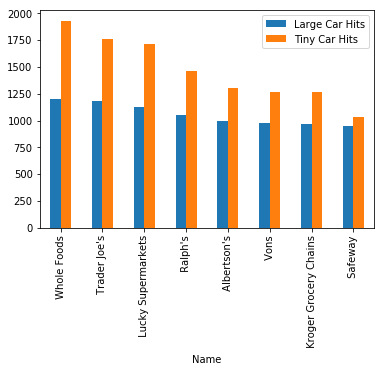

In [70]:
size_grocery_df = size_df.loc[size_df['Business Category'] == 'Shopper: Grocery']
size_grocery_df.plot.bar(x='Name')

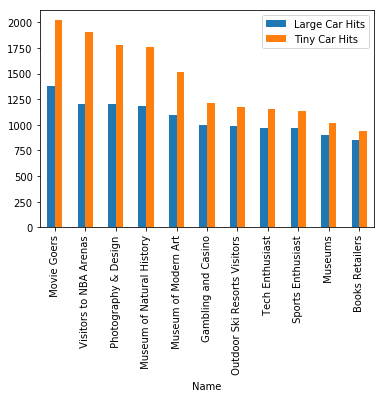

In [71]:
size_interest_df = size_df.loc[size_df['Business Category'] == 'Interest']
size_interest_df.plot.bar(x='Name')

Same problem with large vs tiny car categories